# Exemple

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['variable_column1', 'variable_column2', 'variable_column3']]
y = df['target_column']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# We train the model
model = LogisticRegression().fit(X_train,y_train)

# We predict on the 5 first rows
model.predict(X_test.iloc[:5,:])

NameError: name 'df' is not defined

In [ ]:
model.predict_proba(X_test.iloc[:5, :])

array([[0.51805276, 0.48194724],
       [0.84989964, 0.15010036],
       [0.74912387, 0.25087613],
       [0.47881237, 0.52118763],
       [0.86678898, 0.13321102]])

In [ ]:
model.classes_

array(['Dead', 'Survived'], dtype=object)

In [ ]:
print("score d'exactitude (accuracy) sur l'ensemble d'entraînement :",model.score(X_train, y_train))
print("score d'exactitude (accuracy) sur l'ensemble de test :",model.score(X_test, y_test))

score d'exactitude (accuracy) sur l'ensemble d'entraînement : 0.718796992481203
score d'exactitude (accuracy) sur l'ensemble de test : 0.6441441441441441


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

# After training, you can see how many iterations have been done:
model.n_iter_

array([55], dtype=int32)

In [ ]:
model = LogisticRegression(class_weight = {'cat' : 10})
model.fit(X_train,y_train)

ValueError: The classes, ['Dead', 'Survived'], are not in class_weight

# Execute the code below
You will get a passenger list of the titanic.

In [ ]:
import pandas as pd

In [ ]:
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
print(df_titanic.shape)

(887, 8)


# Data preparation

What are the "type" of each column? Are there non-numeric columns?

In [ ]:
# What are the "type" of each column?

display(df_titanic.dtypes)

Survived                    object
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

In [ ]:
# First exploration:
import plotly.express as px

fig = px.scatter_matrix(df_titanic, dimensions = ["Survived",	"Pclass",	"Sex", "Age",	"Siblings/Spouses Aboard",	"Parents/Children Aboard",	"Fare"], color = "Survived")
fig.show()

In [ ]:
df_titanic["Survived_fac"] = df_titanic["Survived"].factorize()[0]

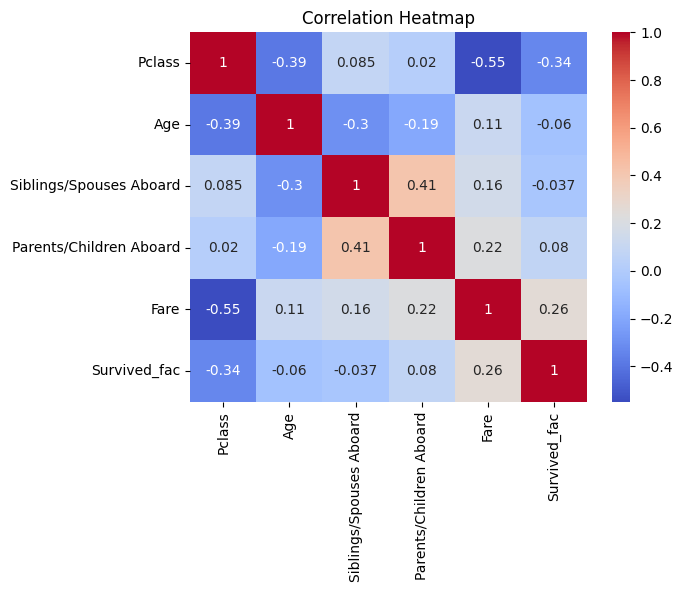

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sans_col = ["Survived", "Name", "Sex"]
data = df_titanic.loc[:, ~df_titanic.columns.isin(sans_col)]
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, cmap="coolwarm", annot = True)
plt.title("Correlation Heatmap")
plt.show()

You are looking for Jack. How many people named Jack on board?

In [ ]:
# How many people named Jack on board?
condition = df_titanic["Name"].str.contains("Jack")
test = df_titanic[condition]
print(test.value_counts())


Survived  Pclass  Name                      Sex   Age   Siblings/Spouses Aboard  Parents/Children Aboard  Fare  Survived_fac
Dead      1       Dr. Arthur Jackson Brewe  male  46.0  0                        0                        39.6  0               1
Name: count, dtype: int64


# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers.
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die.

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [ ]:
display(df_titanic.head())

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived_fac
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0


In [ ]:
# It's up to you:

#Select features (X) with only numeric values, and without "Survived" column
#Select "Survived" column as target (y)

from sklearn.model_selection import train_test_split

X = df_titanic[["Pclass", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]]
y = df_titanic["Survived"]

#Split your data with random_state = 36

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 887
The length of the train dataset is   : 665
The length of the test dataset is    : 222


In [ ]:
#Train a logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
#Print the accuracy score on the train set and on the test set. Is there overfitting?
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_train, y_pred_train)
accuracy2 = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on train: {round(accuracy1, 2)}")
print(f"Accuracy on test: {round(accuracy2, 2)}")

Accuracy on train: 0.72
Accuracy on test: 0.64


In [ ]:
# there is no overfitting

In [ ]:
#Print the Confusion Matrix on the test set

from sklearn.metrics import confusion_matrix

#The confusion matrix is a table that visualizes the performance of your classification model.
#It shows how many observations were correctly classified (on the diagonal) and how many were incorrectly classified (off-diagonal)

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test)),
             index = model.classes_ + " ACTUAL",
             columns = model.classes_ + " PREDICTED")

,Dead PREDICTED,Survived PREDICTED
Dead ACTUAL,109,20
Survived ACTUAL,59,34


In [ ]:
#How many iterations were needed to train this model?
iterations = model.max_iter
print(iterations)

100


# Model improvement

With your fancy time machine, you can, and you will save all the people that the model will predict as dead. But you won't save people predicted as "survived" (because it's not necessary). So change the weights of the classes to be very careful: your goal is to save all the people at risk. So, in this case, it's better to have "actual survived" peopple predicted as death, because you'll save them anyway. Otherwise, "actual death" predicted as survived won't be saved by your time machine.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

In [ ]:
# It's up to you to save everybody:
from sklearn.model_selection import train_test_split

X = df_titanic[["Pclass", "Age", "Siblings/Spouses Aboard", "Parents/Children Aboard", "Fare"]]
y = df_titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=36, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 887
The length of the train dataset is   : 665
The length of the test dataset is    : 222


In [ ]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(class_weight = {"Dead": 0.1, "Survived": 0.5})
model2.fit(X_train, y_train)

LogisticRegression(class_weight={'Dead': 0.1, 'Survived': 0.5})

In [ ]:
y_pred_test = model2.predict(X_test)
y_pred_train = model2.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_train, y_pred_train)
accuracy2 = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on train: {round(accuracy1, 2)}")
print(f"Accuracy on test: {round(accuracy2, 2)}")

Accuracy on train: 0.49
Accuracy on test: 0.48


In [ ]:
#Print the Confusion Matrix on the test set

from sklearn.metrics import confusion_matrix

#The confusion matrix is a table that visualizes the performance of your classification model.
#It shows how many observations were correctly classified (on the diagonal) and how many were incorrectly classified (off-diagonal)

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model2.predict(X_test)),
             index = model2.classes_ + " ACTUAL",
             columns = model2.classes_ + " PREDICTED")

,Dead PREDICTED,Survived PREDICTED
Dead ACTUAL,20,109
Survived ACTUAL,7,86


In [ ]:
iterations = model.max_iter
print(iterations)

100


# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [ ]:
# It's up to you:
probabilities = model.predict_proba(X_test)
print(probabilities[:, 1])

[0.48194724 0.15010036 0.25087613 0.52118763 0.13321102 0.27924232
 0.22008811 0.18164493 0.8197173  0.24828099 0.24014685 0.57094824
 0.57702743 0.27869953 0.25866973 0.34618861 0.28256088 0.73670909
 0.18670537 0.29172803 0.19576751 0.53352906 0.33768187 0.65939321
 0.42096248 0.20125999 0.6341954  0.20173284 0.08843008 0.50446159
 0.36995524 0.46817611 0.59643242 0.14301065 0.96449313 0.16386548
 0.15634589 0.60281651 0.24828099 0.39280436 0.31798696 0.26568376
 0.18660607 0.80454108 0.1039513  0.54207002 0.22914207 0.30329337
 0.10736014 0.08986131 0.59585181 0.28967627 0.18652831 0.16776531
 0.31203091 0.25884937 0.09458886 0.51208014 0.17877543 0.40813902
 0.21994253 0.11956069 0.21994253 0.26903835 0.20298541 0.25860531
 0.75304379 0.93826225 0.27741935 0.24202744 0.31209202 0.4551686
 0.17887147 0.92805387 0.21132995 0.74830928 0.45165653 0.16658632
 0.32935878 0.17836068 0.36652768 0.12553605 0.268205   0.15845638
 0.24891486 0.28943997 0.23111985 0.366748   0.47012915 0.43119

In [ ]:
prediction = pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model2.predict(X_test)),
             index = model2.classes_ + " ACTUAL",
             columns = model2.classes_ + " PREDICTED")
display(prediction)

,Dead PREDICTED,Survived PREDICTED
Dead ACTUAL,20,109
Survived ACTUAL,7,86


In [ ]:
import numpy as np

classe = [1,2,3]
classe_1 = []
classe_2 = []
classe_3 = []

for i in classe:
  probabilities_1 = model.predict_proba(X_test)[0]
  probabilities_2 = model.predict_proba(X_test)[1]
  probabilities_3 = model.predict_proba(X_test)[2]
  data = {'Pclass': X_test['Pclass'], 'SurvivalProbability': probabilities}
  df_survival_probs = pd.DataFrame(data)
  sorted_passengers = df_survival_probs.sort_values(by='SurvivalProbability', ascending=False)
  if i == 1:
    classe_1.append(probabilities_1)
  elif i == 2:
    classe_2.append(probabilities_2)
  else:
    classe_3.append(probabilities_3)

print(sorted_passengers.head(10))
print(classe_1)
print(classe_2)
print(classe_3)
print(np.mean(classe_1))
print(np.mean(classe_2))
print(np.mean(classe_3))

     Pclass  SurvivalProbability
303       1             0.964493
733       1             0.938262
547       1             0.931177
309       1             0.928054
375       1             0.924645
27        1             0.899206
823       2             0.875071
371       1             0.858775
883       1             0.819717
777       1             0.804541
[array([0.51805276, 0.48194724])]
[array([0.84989964, 0.15010036])]
[array([0.74912387, 0.25087613])]
0.5
0.5
0.5


In [ ]:
def proba_per_class(row):
  # Get the survival probabilities
  probabilities = model.predict_proba(X_test)[:, 1]

  # Create a DataFrame with PassengerId and survival probability
  data = {'Pclass': X_test['Pclass'], 'SurvivalProbability': probabilities}
  df_survival_probs = pd.DataFrame(data)

  # Sort passengers by survival probability (descending order)
  sorted_passengers = df_survival_probs.sort_values(by='SurvivalProbability', ascending=False)

  # Display the sorted passengers (showing top 10 for example)
  return sorted_passengers.head(10)

test = X_test["Pclass"].apply(proba_per_class)
print(test)

# Then you can execute this code to see probabilities per class
for i, j in zip(model2.classes_, model2.predict_proba(X_test)[0]):
  print("Prediction probability for:", i, "is", j)


346         Pclass  SurvivalProbability
303       1  ...
458         Pclass  SurvivalProbability
303       1  ...
878         Pclass  SurvivalProbability
303       1  ...
618         Pclass  SurvivalProbability
303       1  ...
178         Pclass  SurvivalProbability
303       1  ...
                             ...                        
345         Pclass  SurvivalProbability
303       1  ...
693         Pclass  SurvivalProbability
303       1  ...
423         Pclass  SurvivalProbability
303       1  ...
19          Pclass  SurvivalProbability
303       1  ...
564         Pclass  SurvivalProbability
303       1  ...
Name: Pclass, Length: 222, dtype: object
Prediction probability for: Dead is 0.19421853894767505
Prediction probability for: Survived is 0.805781461052325


# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

In [ ]:
# It's up to you:


# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?
